# 다이나믹동적프로그래밍

## N으로표현
문제 설명
아래와 같이 5와 사칙연산만으로 12를 표현할 수 있습니다.

12 = 5 + 5 + (5 / 5) + (5 / 5)
12 = 55 / 5 + 5 / 5
12 = (55 + 5) / 5

5를 사용한 횟수는 각각 6,5,4 입니다. 그리고 이중 가장 작은 경우는 4입니다.
이처럼 숫자 N과 number가 주어질 때, N과 사칙연산만 사용해서 표현 할 수 있는 방법 중 N 사용횟수의 최솟값을 return 하도록 solution 함수를 작성하세요

In [ ]:
# 모든 경우의 수를 나타내야한다고 생각했지만
# N에 맞는 숫자로 8개까지의 경우의 수를 만들고, 확인하면 된다
def solution(N, number):
    if N == number : 
        return 1

    s = [set() for _ in range(8)] 

    for i, x in enumerate(s, start = 1) : 
        x.add(int(str(N) * i))

    for i in range(1, 8) :
        for j in range(i) :
            for op1 in s[j] : 
                for op2 in s[i-j-1] :
                    s[i].add(op1+op2)
                    s[i].add(op1-op2)
                    s[i].add(op1*op2)
                    if op2 != 0 :
                        s[i].add(op1//op2)  
        # 궁금 왜 return i+1?
        if number in s[i] :
            return i
    
    return -1

solution(5, 12) #4

3

In [ ]:
# 블로그 풀이
def solution(N, number):
    number_set = [set() for _ in range(8)]
    for i,x in enumerate(number_set, start=1):
        x.add(int(str(N) * i)) #set이기 때문에 append가 아닌 add를 넣어줘야함
    for i in range(1,8): #대환장 4중 for문 우리 알고리즘 선생님 보면 우실 듯 
        for j in range(i): #사실 왜 7까지만 도는지 이해 못함 2+7이 9가 돼서 그런건가봄
            for op1 in number_set[j]:
                for op2 in number_set[i-j-1]:
                    number_set[i].add(op1+op2)
                    number_set[i].add(op1-op2)
                    number_set[i].add(op1 * op2)
                    if op2 != 0 and op1%op2 == 0:
                        number_set[i].add(op1//op2)
        if number in number_set[i] :
            answer = i+1
            break
    else:
        answer = -1


    return answer

# 정수 삼각형
### 문제 설명

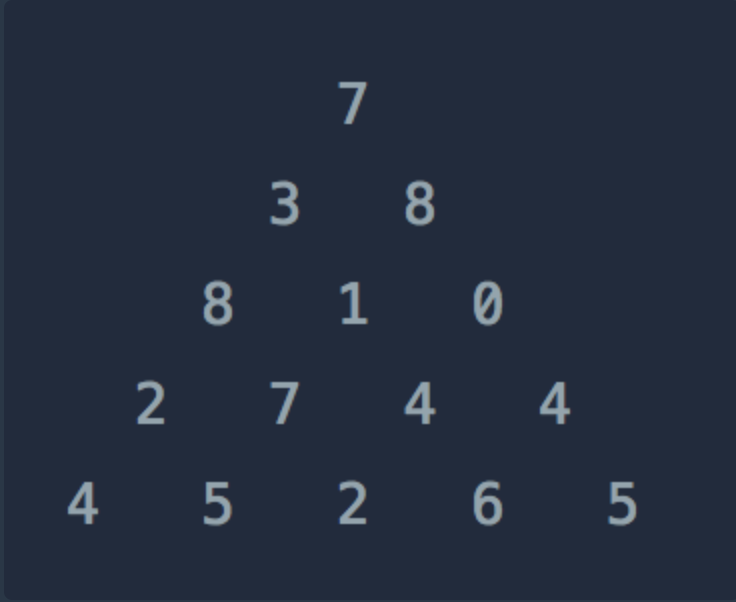


위와 같은 삼각형의 꼭대기에서 바닥까지 이어지는 경로 중, 거쳐간 숫자의 합이 가장 큰 경우를 찾아보려고 합니다. 아래 칸으로 이동할 때는 대각선 방향으로 한 칸 오른쪽 또는 왼쪽으로만 이동 가능합니다. 예를 들어 3에서는 그 아래칸의 8 또는 1로만 이동이 가능합니다.

삼각형의 정보가 담긴 배열 triangle이 매개변수로 주어질 때, 거쳐간 숫자의 최댓값을 return 하도록 solution 함수를 완성하세요.

## 제한사항
삼각형의 높이는 1 이상 500 이하입니다.

삼각형을 이루고 있는 숫자는 0 이상 9,999 이하의 정수입니다.

### 입출력 예
triangle	result

[[7], [3, 8], [8, 1, 0], [2, 7, 4, 4], [4, 5, 2, 6, 5]]	30

In [ ]:
# 1 * 2 * 3 * 4 * 5 ...
def solution(triangle):
    total_sum = [triangle[0][0]]

    for h in range(1, len(triangle)) :
        tmp = []

        tmp.append(total_sum[0] + triangle[h][0])
        for i in range(1, h) :
            if total_sum[i-1] > total_sum[i] :
                tmp.append(total_sum[i-1] + triangle[h][i])
            else :
                tmp.append(total_sum[i] + triangle[h][i])
        tmp.append(total_sum[-1] + triangle[h][-1])
        
        total_sum = tmp

    answer = max(total_sum)

    return answer

solution([[7], [3, 8], [8, 1, 0], [2, 7, 4, 4], [4, 5, 2, 6, 5]])

30

## 도둑질

### 문제 설명
도둑이 어느 마을을 털 계획을 하고 있습니다. 이 마을의 모든 집들은 아래 그림과 같이 동그랗게 배치되어 있습니다.

각 집들은 서로 인접한 집들과 방범장치가 연결되어 있기 때문에 인접한 두 집을 털면 경보가 울립니다.

각 집에 있는 돈이 담긴 배열 money가 주어질 때, 도둑이 훔칠 수 있는 돈의 최댓값을 return 하도록 solution 함수를 작성하세요.

### 제한사항
이 마을에 있는 집은 3개 이상 1,000,000개 이하입니다.

money 배열의 각 원소는 0 이상 1,000 이하인 정수입니다.

### 입출력 예
money	return

[1, 2, 3, 1] 4